### **Importación de datos**



In [60]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Explorar el conjunto de datos
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [61]:
tienda.tail(1)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2358,Smartwatch,Electrónicos,195000.0,8600.0,18/06/2022,Felipe Santos,Cali,4,Tarjeta de crédito,1,3.43722,-76.5225


#1. **Análisis de facturación**



* Creamos un función para sumar los valores de una lista

In [62]:
# Opción 1: Sumar lista por separado

def suma(lista):
    suma_precios = 0
    for precio in lista:
        suma_precios += precio
    return suma_precios

In [63]:
# Opción 2: Sumas listas en lista de listas
def suma2(lista_listas):
    lista_suma = list(sum(lista) for lista in lista_listas)
    return lista_suma

* Guardamos en una lista el precios de los productos vendidos por tienda

In [64]:
Ingreso_tienda = list(tienda["Precio"])
Ingreso_tienda2 = list(tienda2["Precio"])
Ingreso_tienda3 = list(tienda3["Precio"])
Ingreso_tienda4 = list(tienda4["Precio"])

- Primera opción

In [65]:
ingreso_total = suma(Ingreso_tienda)
ingreso_total2 = suma(Ingreso_tienda2)
ingreso_total3 = suma(Ingreso_tienda3)
ingreso_total4 = suma(Ingreso_tienda4)
ingresos= {"Tienda 1" : ingreso_total, "Tienda 2": ingreso_total2, "Tienda 3": ingreso_total3, "Tienda 4": ingreso_total4}
print(ingresos)

{'Tienda 1': 1150880400.0, 'Tienda 2': 1116343500.0, 'Tienda 3': 1098019600.0, 'Tienda 4': 1038375700.0}


- Segunda opción

In [66]:
lista_ingresos = [Ingreso_tienda, Ingreso_tienda2,Ingreso_tienda3, Ingreso_tienda4]
lista = suma2(lista_ingresos)
lista

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

# 2. Ventas por categoría

In [67]:
def ventas_categoria(tienda_funcion):
    categorias = tienda_funcion["Categoría del Producto"].unique()
    venta_ordenado_categorias= tienda_funcion.groupby("Categoría del Producto").size().sort_values( ascending= False)
    ordenado_categorias=tienda_funcion.sort_values("Categoría del Producto", ascending= False)
    return venta_ordenado_categorias, ordenado_categorias

nventas1, ordenado_categoria1 = ventas_categoria(tienda)
nventas2, ordenado_categoria2 = ventas_categoria(tienda2)
nventas3, ordenado_categoria3 = ventas_categoria(tienda3)
nventas4, ordenado_categoria4 = ventas_categoria(tienda4)

topventas = {"Tienda 1": nventas1, "Tienda 2": nventas2, "Tienda 3":nventas3, "Tienda 4":nventas4}
print(f"Categorias mas vendidas por tienda{topventas}") # Aqui mostramos las ventas por producto de cada tienda de mayor a menor
df_topventas = pd.DataFrame(topventas) # Creamos una DataFrame para mostrar un tabla con las ventas por producto de cada tienda
print(df_topventas)

Categorias mas vendidas por tienda{'Tienda 1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64, 'Tienda 2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64, 'Tienda 3': Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64, 'Tienda 4': Categoría del Producto
Muebles                    480
Electrón

# 3. Calificación promedio de la tienda


In [68]:
def promedio_calificacion(tienda_cal):
    suma_cal = 0
    for calificacion in tienda_cal:
        suma_cal += calificacion
    promedio = suma_cal/len(tienda_cal)
    return promedio

In [69]:
calificacion_tienda1 = list(tienda["Calificación"])
calificacion_tienda2 = list(tienda2["Calificación"])
calificacion_tienda3 = list(tienda3["Calificación"])
calificacion_tienda4 = list(tienda4["Calificación"])
promedio1 = promedio_calificacion(calificacion_tienda1)
promedio2 = promedio_calificacion(calificacion_tienda2)
promedio3 = promedio_calificacion(calificacion_tienda3)
promedio4 = promedio_calificacion(calificacion_tienda4)

print(promedio1, promedio2, promedio3, promedio4)



3.976685036032217 4.037303942348453 4.048325561678677 3.9957591178965224


# 4. Productos más y menos vendidos

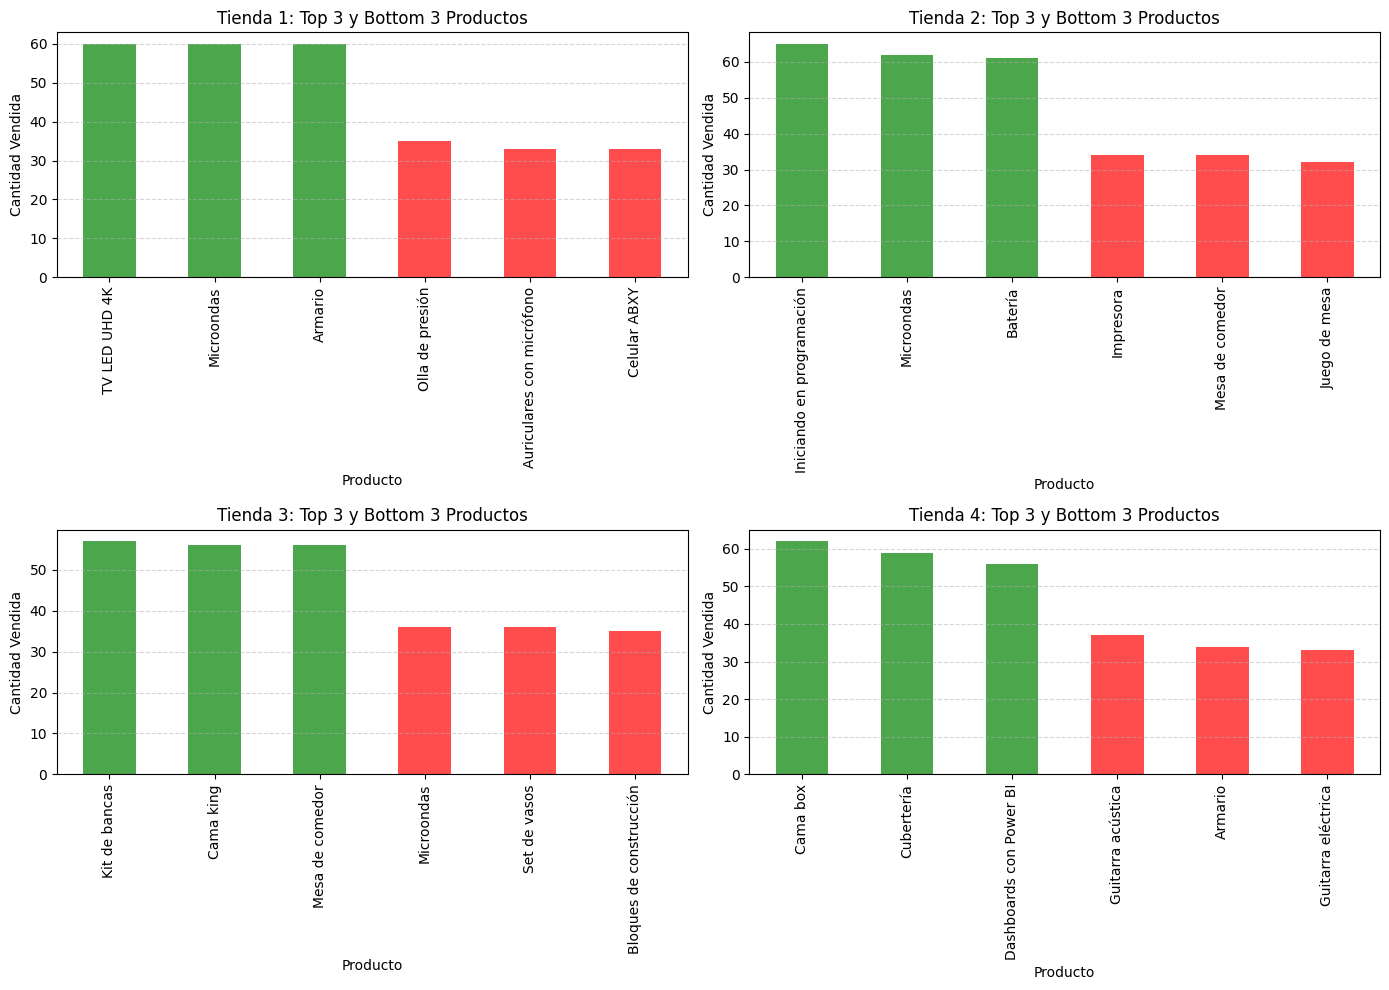

In [73]:
import matplotlib.pyplot as plt


def ventas_productos(tienda_p):
    categorias = tienda_p["Producto"].unique()
    venta_ordenado_categorias= tienda_p.groupby("Producto").size().sort_values( ascending= False)
    ordenado_categorias=tienda_p.sort_values("Producto", ascending= False)
    return venta_ordenado_categorias, ordenado_categorias

nventas1_p, ordenado_categoria1_p = ventas_productos(tienda)
nventas2_p, ordenado_categoria2_p = ventas_productos(tienda2)
nventas3_p, ordenado_categoria3_p = ventas_productos(tienda3)
nventas4_p, ordenado_categoria4_p = ventas_productos(tienda4)

topventas_p = {"Tienda 1": nventas1_p, "Tienda 2": nventas2_p, "Tienda 3":nventas3_p, "Tienda 4":nventas4_p}
#print(f"Productos mas vendidos por tienda{topventas_p}") # Aqui mostramos las ventas por producto de cada tienda de mayor a menor
df_topventas_p = pd.DataFrame(topventas_p) # Creamos una DataFrame para mostrar un tabla con las ventas por producto de cada tienda
#print(df_topventas_p)

# Visualización

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
tiendas = df_topventas_p.columns

for i, tienda_n in enumerate(tiendas):
    # Obtener datos de la tienda y ordenar
    ventas_tienda = df_topventas_p[tienda_n].sort_values(ascending=False)
    
    # Seleccionar Top 3 y Bottom 3. Si se necesitan visualizar mas, solo cambiar el número 3
    top_3 = ventas_tienda.head(3)
    bottom_3 = ventas_tienda.tail(3)
    
    # Combinar
    combined = pd.concat([top_3, bottom_3])
    
    # Graficar
    ax = axes[i]
    # Verde: 3 mas vendidos. Rojo: 3 menos vendidos
    colors = ['green'] * len(top_3) + ['red'] * len(bottom_3)

    combined.plot(kind='bar', ax=ax, color=colors, alpha=0.7)
    ax.set_title(f'{tienda_n}: Top 3 y Bottom 3 Productos')
    ax.set_ylabel('Cantidad Vendida')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('ventas_top_bottom_tiendas.png')

# 5. Envío promedio por tienda